<a href="https://colab.research.google.com/github/SithmiDesilva/Parkinsons_Disease_Detection_System/blob/main/Advanced_Mathematics_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CM2607-Advanced Mathematics - CW01

Sithmi De Silva

IIT ID - 20231045

RGU ID - 2409664

In [ ]:
# Import Libraries
##Added commits
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft, fftfreq
from scipy.fftpack import fft2, ifft2, fftshift
import cv2

# Question 1

a) Find Partial derivatives
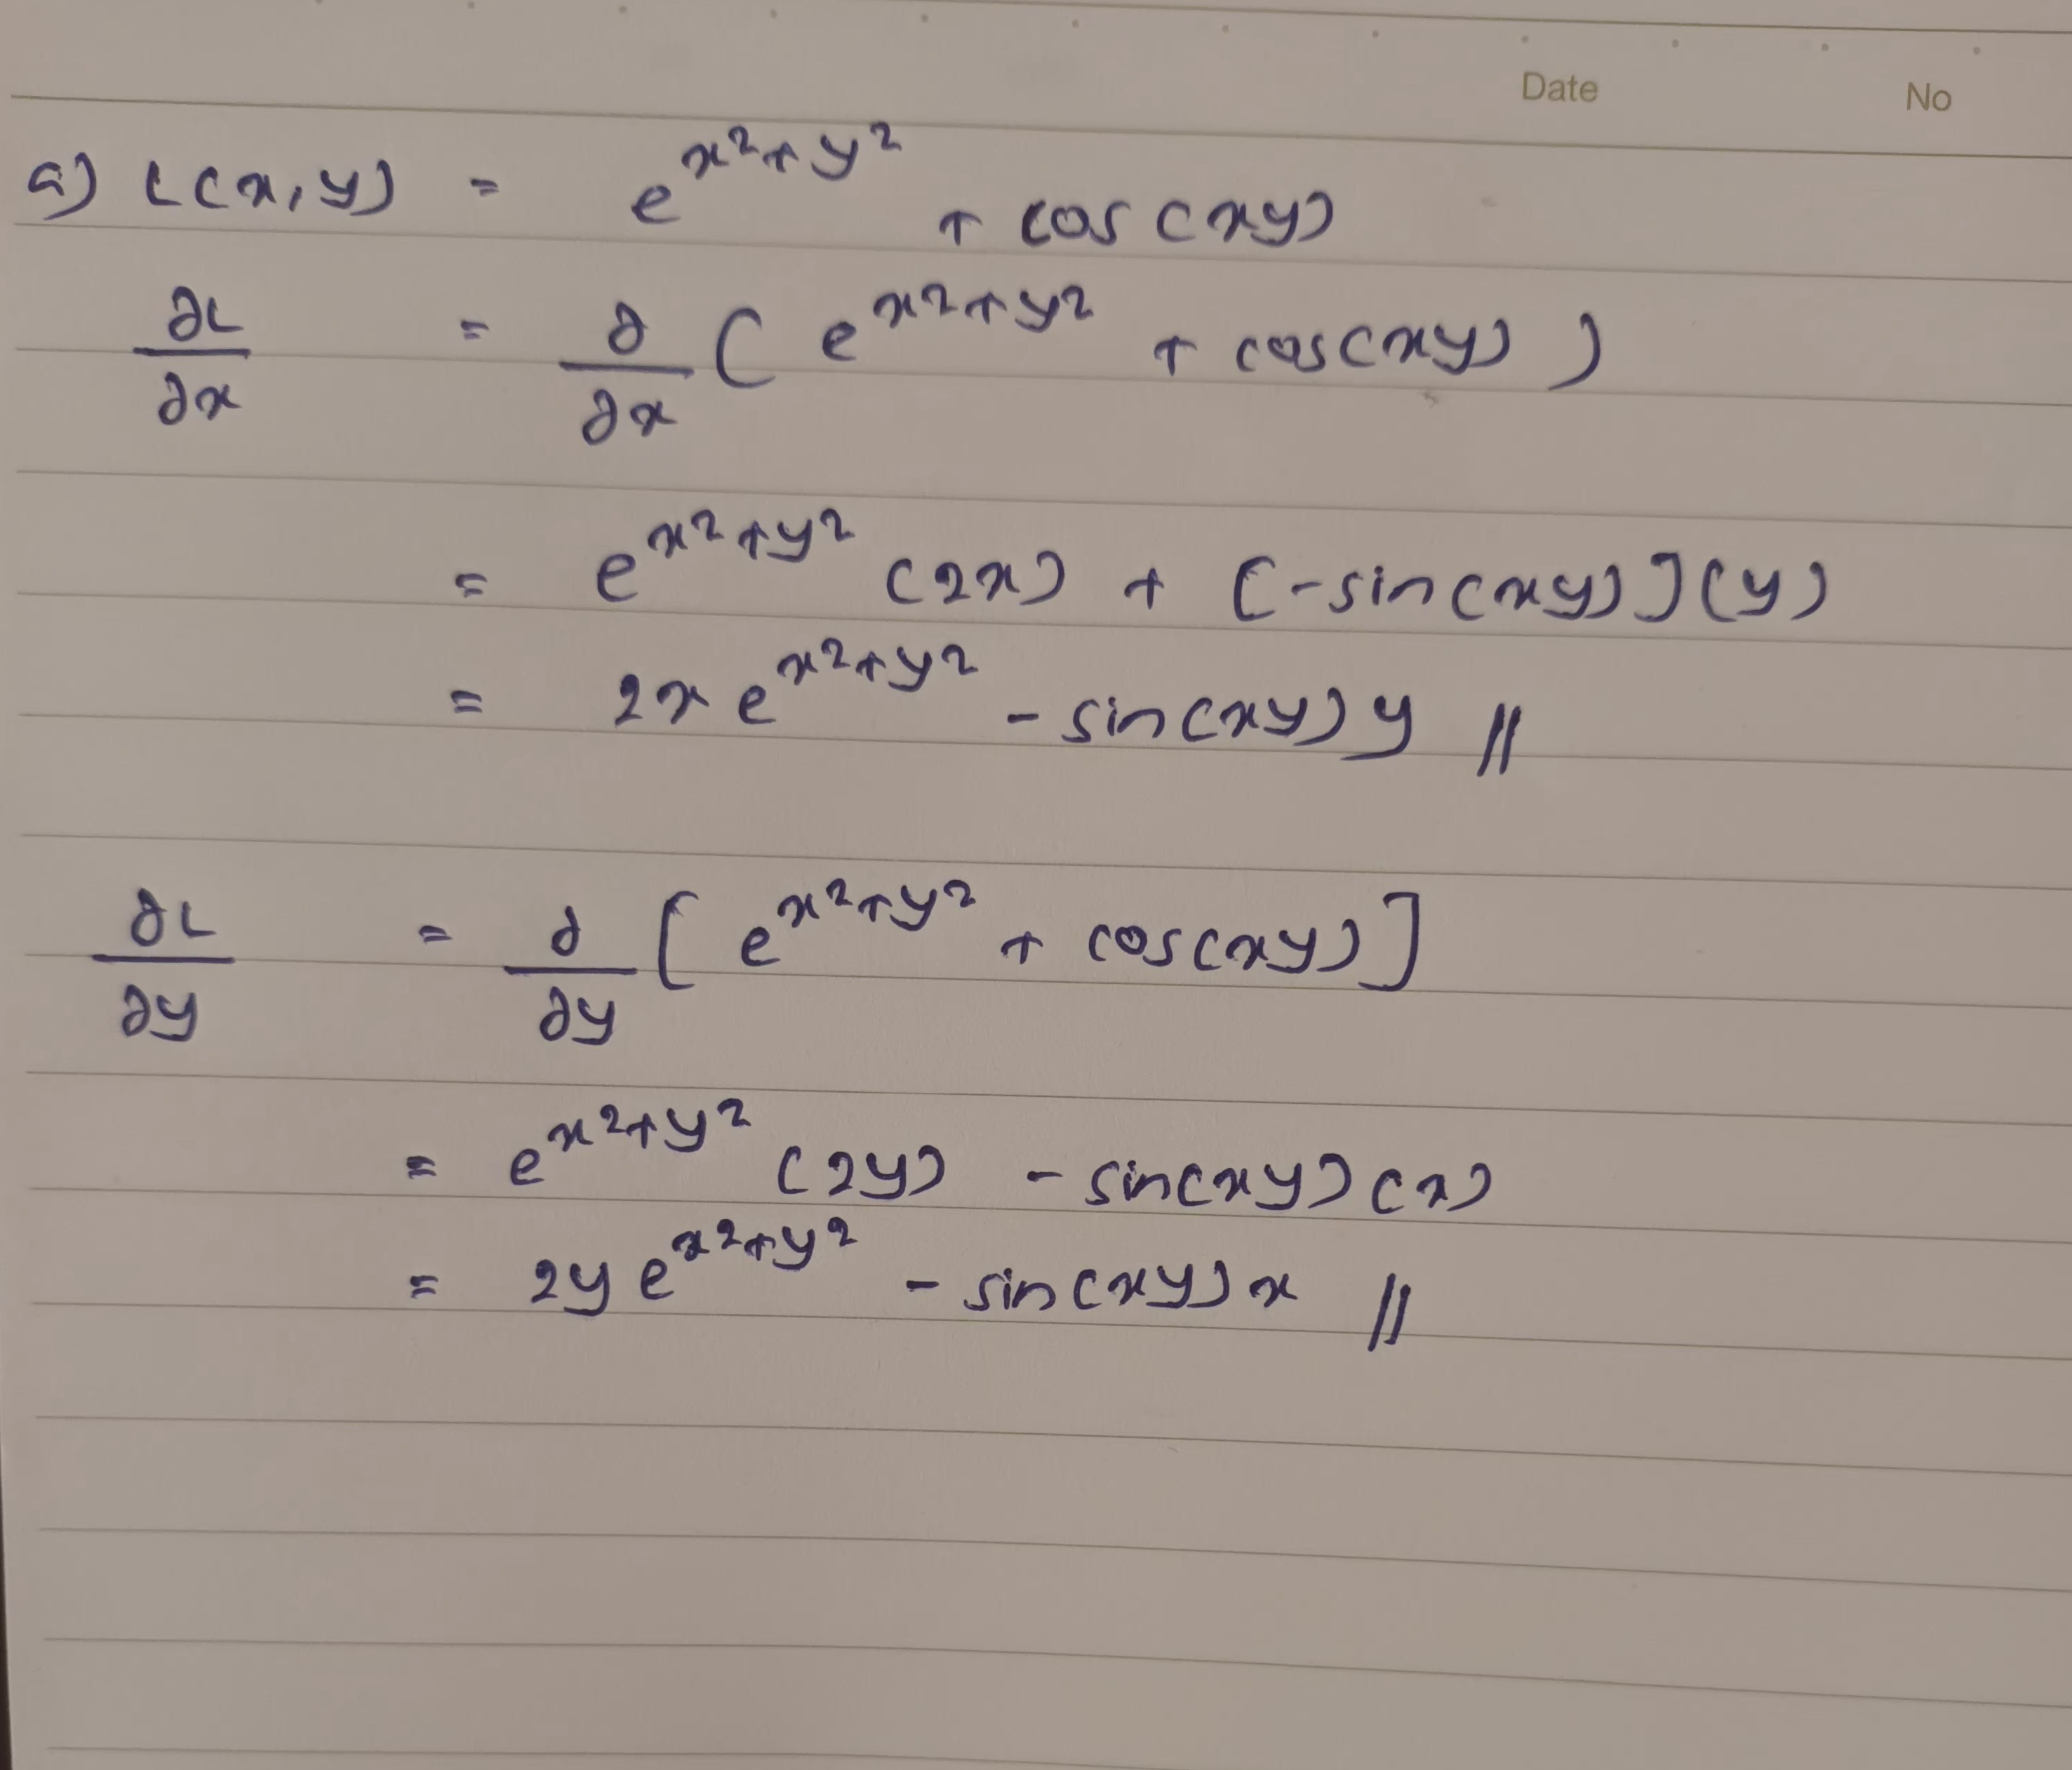

b) Python function for gradient

In [ ]:
def compute_gradient(x, y):
  #Compute partial derivatives
    partial_diff_x = 2 * x * np.exp(x**2 + y**2) - y * np.sin(x * y)
    partial_diff_y = 2 * y * np.exp(x**2 + y**2) - x * np.sin(x * y)
    #Returning the partial derivatives
    return np.array([partial_diff_x,partial_diff_y])


c) Visualize Loss Function

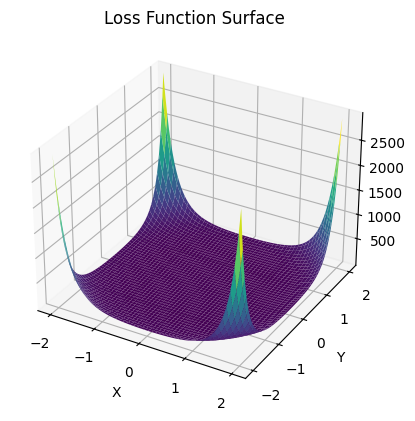

In [ ]:
#Creating meshgrid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
#Loss function
Z = np.exp(X**2 + Y**2) + np.cos(X * Y)

#3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

#Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.title('Loss Function Surface')

#Display the function
plt.show()


d)Gradient vector significance


In model optimization, gradient descent is used to minimize the cost function, effectively narrowing the gap between the predicted values and the true results, thereby enhancing the accuracy of a machine learning model. The gradient vector indicates the direction of the steepest ascent of the loss function. However, to reduce the loss, the model's parameters are adjusted in the opposite direction of the gradient. This iterative process guides the model toward the minimum of the loss function, refining its parameters to reduce errors and improve overall performance and accuracy.



# Question 2

a) Compute definite integral

In [ ]:
#Defining variable 't' and function 'A(t)'
t = sp.symbols('t')
A = 2 * t**2 * sp.exp(-t)

#Compute definite integral in range 0 and 4
integral = sp.integrate(A, (t, 0, 4))
print("Definite integral:", integral.evalf())


Definite integral: 3.04758677778582


b) Plot function and annotate

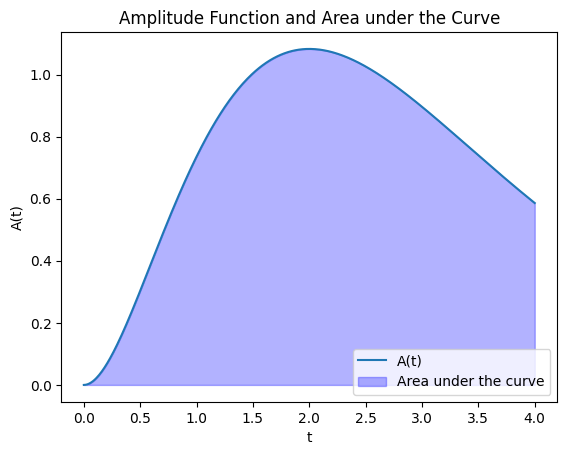

In [ ]:
#Value for 't' from 0 to 4
t = np.linspace(0, 4, 500)

#Comput A(t)
A = 2 * t**2 * np.exp(-t)

#Plot the function
plt.plot(t, A, label='A(t)')
plt.fill_between(t, A, alpha=0.3, color='blue',label="Area under the curve")

#Labels
plt.title("Amplitude Function and Area under the Curve")
plt.xlabel("t")
plt.ylabel("A(t)")
plt.legend()

#Display the function
plt.show()


c) The energy of a signal is typically calculated by integrating the square of its amplitude over a specified time interval. This integral provides a quantitative measure of the signal's energy, which corresponds to its transmitted strength. For the signal with amplitude described by \( A(t) = 2t^2e^{-t} \), the total energy is determined by evaluating the integral of \( A(t)^2 \) over the time interval from 0 to 4. This computed value represents the total energy contained in the signal within that time frame.

# Question 3

a) Approximation script

In [ ]:
#Method to do approximation of the series
def approx_ln1p(x, terms=10):
    result = 0
    for n in range(1, terms + 1):
        result += (-1)**(n+1) * (x**n) / n
    return result


b) Plot approximation and actual function

<ipython-input-8-1bf8e46d174d>:5: RuntimeWarning: divide by zero encountered in log1p
  actual_series = np.log1p(x)


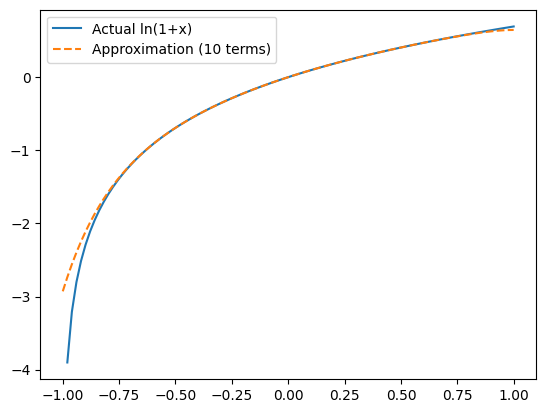

In [ ]:
#Plot approximation
x = np.linspace(-1, 1, 100)

#Actual series
actual_series = np.log1p(x)

#Approximate series
approximate_series = [approx_ln1p(val, 10) for val in x]

#Plot the function
plt.plot(x,actual_series, label='Actual ln(1+x)')
plt.plot(x,approximate_series, label='Approximation (10 terms)', linestyle='--')
plt.legend()

#Display the function
plt.show()


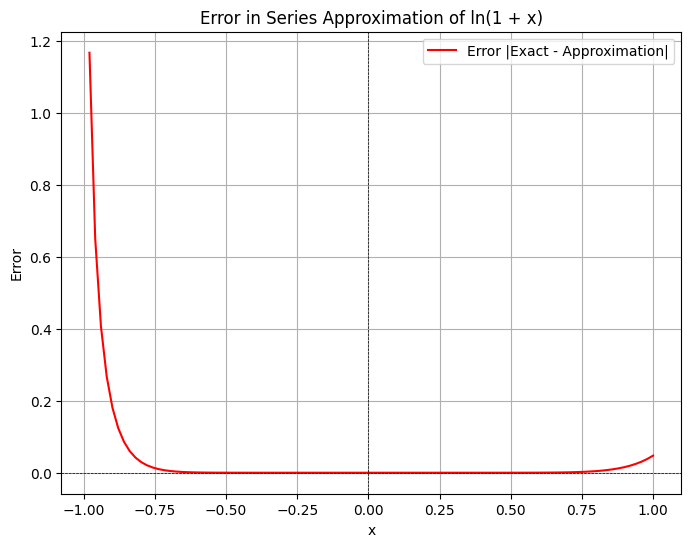

In [ ]:

# Compute the error using the same x as defined above
error = np.abs(actual_series - approximate_series)

# Plot the error, ensuring x and error have the same length
plt.figure(figsize=(8, 6))
plt.plot(x, error, label="Error |Exact - Approximation|", color='red') # Use the x with 100 elements
plt.title("Error in Series Approximation of ln(1 + x)")
plt.xlabel("x")
plt.ylabel("Error")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

c) Convergence behaviour

The convergence of the series for ln(1+x) depends on the value of \( x \). For values of \( x \) close to zero, the series converges more quickly because the terms decrease in size rapidly. Conversely, for values of \( x \) closer to 1, the series converges more slowly since the terms remain relatively larger, requiring more terms to achieve a desired level of accuracy.

# Question 4

a) Frequency spectrum

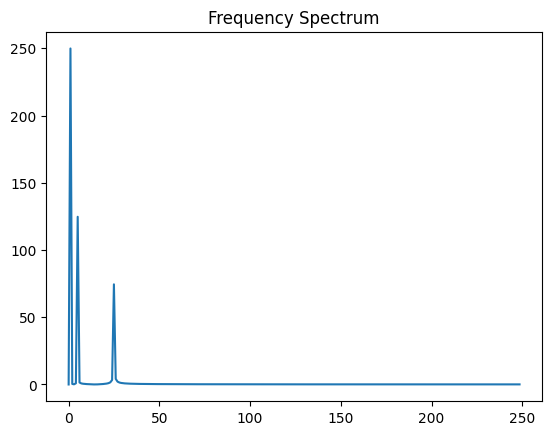

In [ ]:
#Set range(0,1) and 500 sample points
t = np.linspace(0, 1, 500)

#Equation of the signal
signal = np.sin(2 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.3 * np.sin(50 * np.pi * t)

#Frequencies
frequency = fftfreq(len(t), t[1] - t[0])
fft_values = fft(signal)

#Plot the function
plt.plot(frequency[:len(frequency)//2], np.abs(fft_values)[:len(frequency)//2])
plt.title("Frequency Spectrum")

#Display the function
plt.show()


b) Low-Pass filter

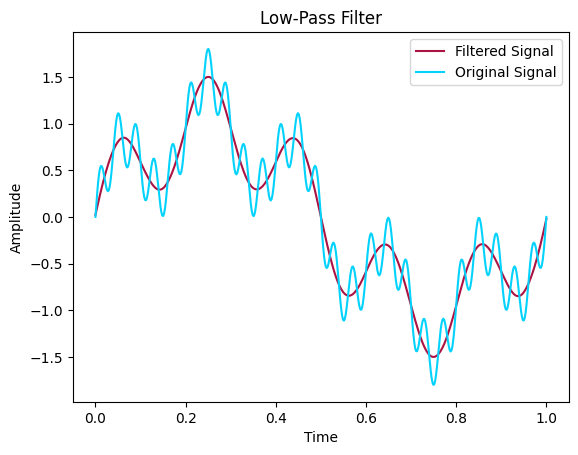

In [ ]:
#Filter the signal inorder to remove frequencies above 20Hz
fft_values[np.abs(frequency) > 20] = 0
filtered_signal = np.real(np.fft.ifft(fft_values))

#Plot the function
plt.plot(t, filtered_signal, label="Filtered Signal",color="#ab1343")
plt.plot(t, signal, label="Original Signal",color="#03d3fc")

#Labels
plt.title("Low-Pass Filter")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

#Display the function
plt.show()


c) Filtering impact

Filtering plays a crucial role in signal processing by amplifying or attenuating specific frequency components, thereby enhancing signal quality. In practical data science applications, filtering is widely employed for noise reduction, particularly in audio processing. For instance, a low-pass filter is used to eliminate high-frequency noise from audio signals, retaining the key sound frequencies while discarding unwanted disturbances. This technique enhances clarity, making it invaluable for applications such as speech recognition and music production.

# Question 5

a) Edge detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


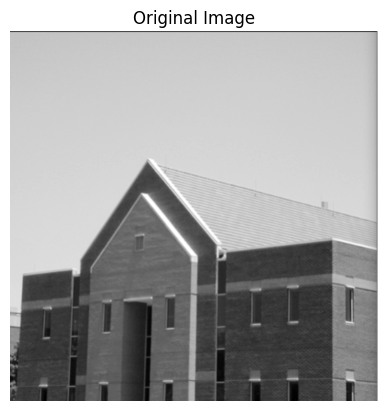

In [ ]:
# Load image
img = cv2.imread('/content/drive/MyDrive/CM2607 CW/Image (1).png', cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
plt.imshow(img, cmap='gray')

#Normalize to [0,1]
img=img/255.0

#Labels
plt.title("Original Image")
plt.axis('off')

#Display image
plt.show()


In [ ]:
# Apply 2D Fourier Transform
fft_img = fft2(img)

# Shift the zero frequency component to the center
fft_shifted = fftshift(fft_img)



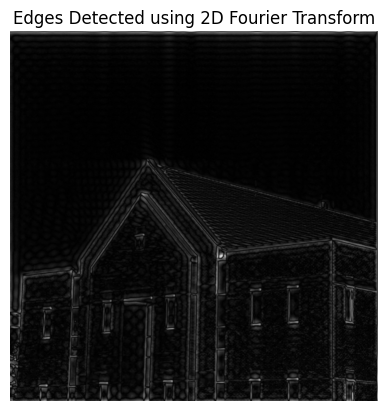

In [ ]:
#Get the dimensions of the image
rows, cols = img.shape

#Compute the center of the image
crow, ccol = rows // 2, cols // 2

# Create a mask to filter out low-frequency components
mask = np.ones((rows, cols), np.uint8)

# Block low-frequency components by setting a central square to zero
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

# Apply the mask to the Fourier-transformed image
filtered_fft = fft_shifted * mask

# Perform the inverse Fourier transform to get the filtered image
filtered_img = np.abs(ifft2(np.fft.ifftshift(filtered_fft)))

#Display edges
plt.imshow(filtered_img, cmap='gray')
plt.title("Edges Detected using 2D Fourier Transform")
plt.axis('off')
plt.show()


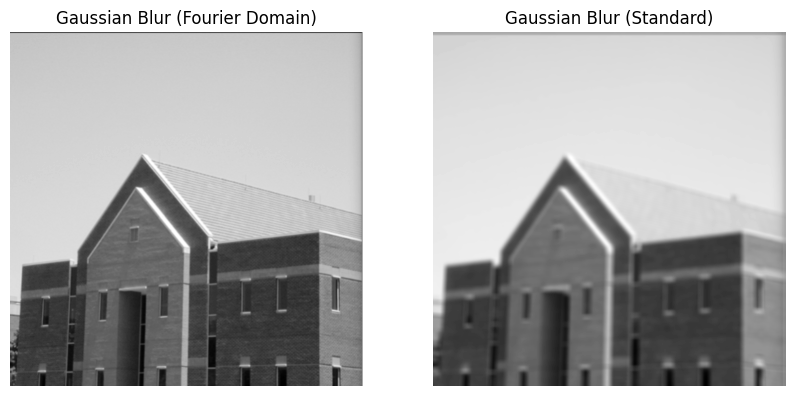

In [ ]:
# Fourier Transform of the image
f = fft2(img)
f_shift = fftshift(f)

# Create a Gaussian filter in the frequency domain
x = np.linspace(-0.5, 0.5, cols)
y = np.linspace(-0.5, 0.5, rows)
xv, yv = np.meshgrid(x, y)

# Standard deviation for Gaussian
sigma = 10
gaussian_filter = np.exp(-(xv**2 + yv**2) / (2 * (sigma**2)))

# Apply the Gaussian filter to the shifted Fourier Transform
f_shift_blurred = f_shift * gaussian_filter

# Perform the inverse Fourier Transform to get the blurred image
f_ishift_blurred = np.fft.ifftshift(f_shift_blurred)
image_blurred_fourier = np.abs(ifft2(f_ishift_blurred))

# Apply a standard Gaussian blur (spatial domain)
image_blurred_spatial = cv2.GaussianBlur(img, (15, 15), sigmaX=10)

# Display the results
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.title("Gaussian Blur (Fourier Domain)")
plt.imshow(image_blurred_fourier, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Blur (Standard)")
plt.imshow(image_blurred_spatial, cmap='gray')
plt.axis("off")
plt.show()

c) Apply DCT and Compress the image

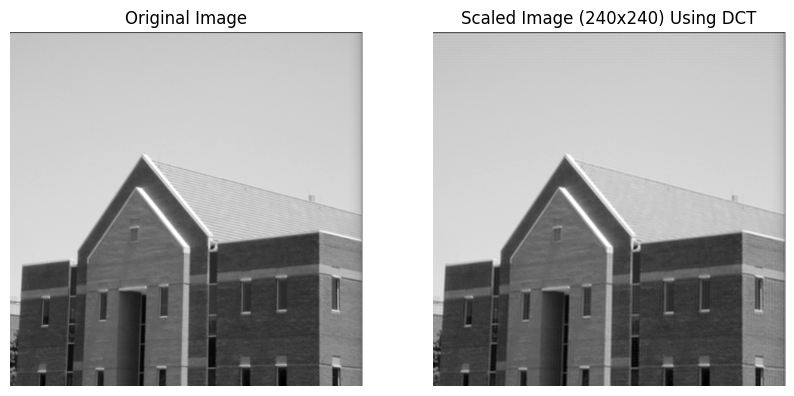

In [ ]:

img = cv2.imread("/content/drive/MyDrive/CM2607 CW/Image (1).png", cv2.IMREAD_GRAYSCALE)
# Normalize the image to [0, 1]
img_normalized = img.astype(np.float32) / 255.0

# Apply Discrete Cosine Transform (DCT)
dct_image = cv2.dct(img_normalized)

# Downscale the DCT coefficients to 240x240

dct_resized = np.zeros_like(dct_image)
dct_resized[:240, :240] = dct_image[:240, :240]

# Apply Inverse DCT (IDCT) to restore the image
restored_image = cv2.idct(dct_resized)

# Denormalize the image back to 0-255 range
restored_image = np.clip(restored_image * 255.0, 0, 255).astype(np.uint8)

# Display the result
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title("Scaled Image (240x240) Using DCT")
plt.axis('off')

plt.show()

d) Common compression artifacts using DCT

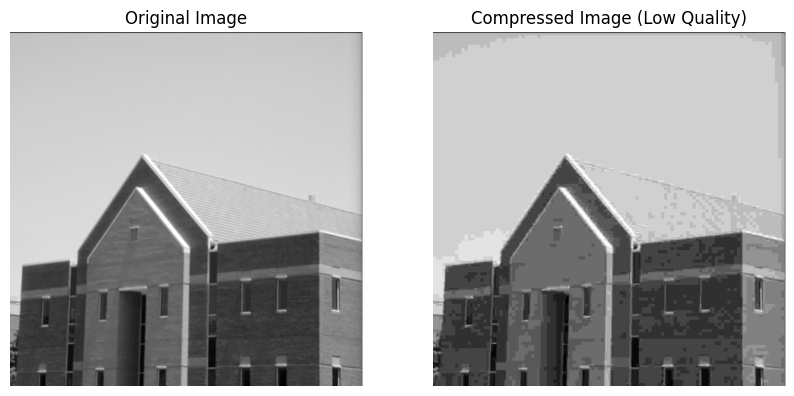

In [ ]:

# Save the image with high compression (low quality)
compressed_filename = 'compressed.jpg'
cv2.imwrite(compressed_filename, img, [cv2.IMWRITE_JPEG_QUALITY, 5])  # Quality 10 (very low)

# Reload the compressed image
compressed_img = cv2.imread(compressed_filename, cv2.IMREAD_GRAYSCALE)

# Show Original and Compressed Images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_img, cmap='gray')
plt.title("Compressed Image (Low Quality)")
plt.axis('off')
plt.show()


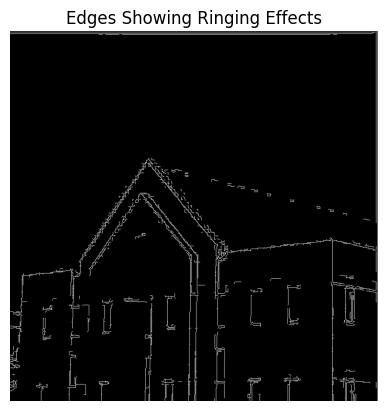

In [ ]:
edges = cv2.Canny(compressed_img, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Edges Showing Ringing Effects")
plt.axis('off')
plt.show()


Ringing Artifacts: Ringing artifacts appear around sharp transitions or abrupt edges in an image. These occur during compression using the Discrete Cosine Transform (DCT), where oscillations become noticeable near these edges due to the transformation process.  

Blocking Artifacts: Blocking artifacts are caused by dividing the image into smaller blocks for DCT-based compression. Each block is processed independently, and when high-frequency components are lost during compression, the boundaries between blocks become apparent, resulting in a visible block-like pattern in the image.